In [63]:
import pandas as pd
import requests
import yfinance as yf
import datetime 
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = yf.download("AMZN MSFT", start="2019-01-01", end="2021-04-01",group_by="ticker") 
print(df) 
print(df.AMZN)

[*********************100%***********************]  2 of 2 completed
                   AMZN                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2019-01-02  1465.199951  1553.359985  1460.930054  1539.130005  1539.130005   
2019-01-03  1520.010010  1538.000000  1497.109985  1500.280029  1500.280029   
2019-01-04  1530.000000  1594.000000  1518.310059  1575.390015  1575.390015   
2019-01-07  1602.310059  1634.560059  1589.189941  1629.510010  1629.510010   
2019-01-08  1664.689941  1676.609985  1616.609985  1656.579956  1656.579956   
...                 ...          ...          ...          ...          ...   
2021-03-25  3072.989990  3109.780029  3037.139893  3046.260010  3046.260010   
2021-03-26  3044.060059  3056.659912  2996.000000  3052.030029  3052.030029   
2021-03-29  3055.439941  3091.250000  3028.449951  3075.729980

In [30]:
Amazon=df.AMZN

In [31]:
Amazon=df.AMZN

In [33]:
Amazon.describe()

,Open,High,Low,Close,Adj Close,Volume
count,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,2337.072810,2362.984060,2308.613975,2336.601958,2336.601958,4.318077e+06
std,635.977150,645.278551,622.655254,632.787789,632.787789,1.822480e+06
min,1465.199951,1538.000000,1460.930054,1500.280029,1500.280029,8.813000e+05
25%,1796.057495,1805.802521,1782.105011,1794.562531,1794.562531,3.025675e+06
50%,1948.400024,1976.500000,1930.260010,1958.974976,1958.974976,3.916400e+06
75%,3100.875000,3134.184998,3065.409973,3097.574890,3097.574890,5.114300e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,1.556730e+07


In [36]:
Amazon['Close'].shift(-1)

Date
2019-01-02    1500.280029
2019-01-03    1575.390015
2019-01-04    1629.510010
2019-01-07    1656.579956
2019-01-08    1659.420044
                 ...     
2021-03-25    3052.030029
2021-03-26    3075.729980
2021-03-29    3055.290039
2021-03-30    3094.080078
2021-03-31            NaN
Name: Close, Length: 566, dtype: float64

In [37]:
Amazon['price1']=Amazon['Close'].shift(-1)

/home/dnlab_admin/anaconda3/envs/jupyterhub37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
Amazon

,Open,High,Low,Close,Adj Close,Volume,price1
Date,,,,,,,
2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100,1500.280029
2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600,1575.390015
2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600,1629.510010
2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200,1656.579956
2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400,1659.420044
...,...,...,...,...,...,...,...
2021-03-25,3072.989990,3109.780029,3037.139893,3046.260010,3046.260010,3563500,3052.030029
2021-03-26,3044.060059,3056.659912,2996.000000,3052.030029,3052.030029,3306700,3075.729980
2021-03-29,3055.439941,3091.250000,3028.449951,3075.729980,3075.729980,2746000,3055.290039


In [42]:
Amazon['priceDiff']=Amazon['price1']-Amazon['Close']

/home/dnlab_admin/anaconda3/envs/jupyterhub37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
Amazon['return']=Amazon['priceDiff']/Amazon['Close']

/home/dnlab_admin/anaconda3/envs/jupyterhub37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
#List Comprehesion
#Selecting data by row numbers (.iloc)
#Selecting data by label or by a conditional statment (.loc)
Amazon['direction']=[1 if Amazon.loc[ei,'priceDiff']>0 else -1 for ei in Amazon.index]

/home/dnlab_admin/anaconda3/envs/jupyterhub37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [45]:
#MovingAverage
Amazon['Avg3']=(Amazon['Close']+Amazon['Close'].shift(1)+Amazon['Close'].shift(2))/3

/home/dnlab_admin/anaconda3/envs/jupyterhub37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
#calculate moving average using rolling 
Amazon['MA40']=Amazon['Close'].rolling(40).mean()

In [47]:
Amazon['MA200']=Amazon['Close'].rolling(200).mean()

In [48]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

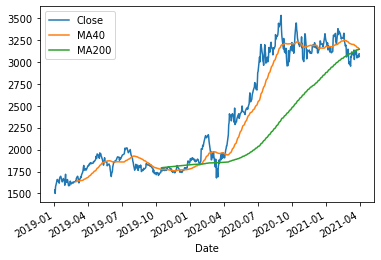

In [51]:
Amazon['Close'].plot(legend=True)
Amazon['MA40'].plot(legend=True)
Amazon['MA200'].plot(legend=True)
##
#If MA40 is above MA200, some traders who we call trend-following traders,
#they believe the stock price will move upwards for a while.

In [52]:
stock2419 = pd.read_csv('PythonBook_code_data/part4/027/2419.csv', sep='\t')

In [53]:
stock2419['price1']=stock2419['Close'].shift(-1)
#PriceDiff = (close price of tomorrow - Close price of today)
stock2419['priceDiff']=stock2419['price1']-stock2419['Close']
#DailyReturn = PriceDiff/close price of today
stock2419['return']=stock2419['priceDiff']/stock2419['Close']

In [54]:
#List Comprehesion
#Selecting data by row numbers (.iloc)
#Selecting data by label or by a conditional statment (.loc)
stock2419['direction']=[1 if stock2419.loc[ei,'priceDiff']>0 else -1 for ei in stock2419.index]

In [55]:
#MovingAverage
stock2419['Avg3']=(stock2419['Close']+stock2419['Close'].shift(1)+stock2419['Close'].shift(2))/3

In [56]:
#calculate moving average using rolling 
stock2419['MA40']=stock2419['Close'].rolling(40).mean()

In [57]:
stock2419['MA200']=stock2419['Close'].rolling(200).mean()

In [58]:
%matplotlib inline

In [59]:
stock2419.index = pd.to_datetime(stock2419.Date)

<AxesSubplot:xlabel='Date'>

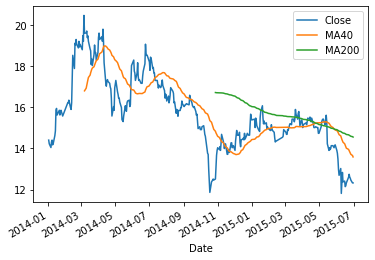

In [60]:
stock2419['Close'].plot(legend=True)
stock2419['MA40'].plot(legend=True)
stock2419['MA200'].plot(legend=True)
##
#If MA40 is above MA200, some traders who we call trend-following traders,
#they believe the stock price will move upwards for a while.

In [61]:
stock2419

,Date,Close,Open,High,Low,Volume,ROI,price1,priceDiff,return,direction,Avg3,MA40,MA200
Date,,,,,,,,,,,,,,
2014-01-02,2014-01-02,14.40,14.04,14.49,14.04,2612,2.5806,14.22,-0.18,-0.012500,-1,NaN,NaN,NaN
2014-01-03,2014-01-03,14.22,14.13,14.35,14.13,1138,-1.2579,14.04,-0.18,-0.012658,-1,NaN,NaN,NaN
2014-01-06,2014-01-06,14.04,14.22,14.35,13.99,1372,-1.2739,14.31,0.27,0.019231,1,14.220000,NaN,NaN
2014-01-07,2014-01-07,14.31,14.04,14.40,14.04,2741,1.9355,14.40,0.09,0.006289,1,14.190000,NaN,NaN
2014-01-08,2014-01-08,14.40,14.40,14.67,14.31,3891,0.6329,14.17,-0.23,-0.015972,-1,14.250000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-24,2015-06-24,12.60,12.74,12.78,12.55,317,-1.0909,12.55,-0.05,-0.003968,-1,12.646667,13.83025,14.62270
2015-06-25,2015-06-25,12.55,12.65,12.74,12.51,371,-0.3676,12.46,-0.09,-0.007171,-1,12.630000,13.76875,14.60460
2015-06-26,2015-06-26,12.46,12.55,12.65,12.41,343,-0.7380,12.32,-0.14,-0.011236,-1,12.536667,13.71200,14.58675
